Este proyecto se realiza en equipos.

Objetivo general del proyecto
Aplicar diversas variantes del algoritmo de regresión en la solución de un problema de aprendizaje automático.

Problema a solucionar
Estimar la puntuación de calidad de un vino.

Base de datos (véase archivo anexo)
https://archive.ics.uci.edu/ml/datasets/wine+quality

Actividades a desarrollar

Investigar acerca de las siguientes variantes del algoritmo: (a) Stochastic Gradient Descent y (b) Mini-batch Gradient Descent. ¿Cuáles son las diferencias y las ventajas/desventajas entre estas variantes? ¿cuáles son las condiciones bajo las cuales se prefieren aplicar estas variantes?. 

Investigar acerca de los procesos de normalización y estandarización de los parámetros de entrada (features).

Implementar en Python algoritmos "Multivariate Linear Regression" para la solución del problema, en sus variantes: (a) Ecuación Normal, (b) Batch Gradient Descent, (c) Stochastic Gradient Descent y (d) Mini-batch Gradient Descent; comparar las soluciones obtenidas.

Investigar acerca del algoritmo "Polynomial Regression". ¿Cuándo se aplica?, ¿qué problemas puede presentar una solución basada en este algoritmo?

Implementar en Python el algoritmo de "Polynomial Regression" para la solución de: (a) un conjunto (nube) de datos generados artificialmente (véase ejemplo de clase), y (b) el problema de la calidad del vino. Para el inciso (b) se recomienda revisar el tema "Turning a linear regression model into a curve – polynomial regression", del libro "Python Machine Learning".

Conclusiones generales a nivel de equipo; comentarios individuales (véase rúbrica).

Elaborar el "Reporte 1" especificado en la presentación del primer día de clases. Debe documentarse la información de los incisos 1-6.

Elaborar una video-entrega (todos los integrantes del equipo deberán participar). Como parte de la evaluación se consideran el dominio, la comprensión y la profundidad plasmadas en las explicaciones. Debe presentarse la información de los incisos 1-6.

Revisar en la presentación del primer día de clases
Los requisitos para la "Entrega en plataforma digital".
Los criterios de evaluación de (a) la "Entrega virtual" y (b) el "Reporte digital".


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Cargamos los datos

In [86]:
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## A razon de lo aprendido cuando interactuamos con la libreria seaborn, se aprovecho realizar un HeatMap

<AxesSubplot:>

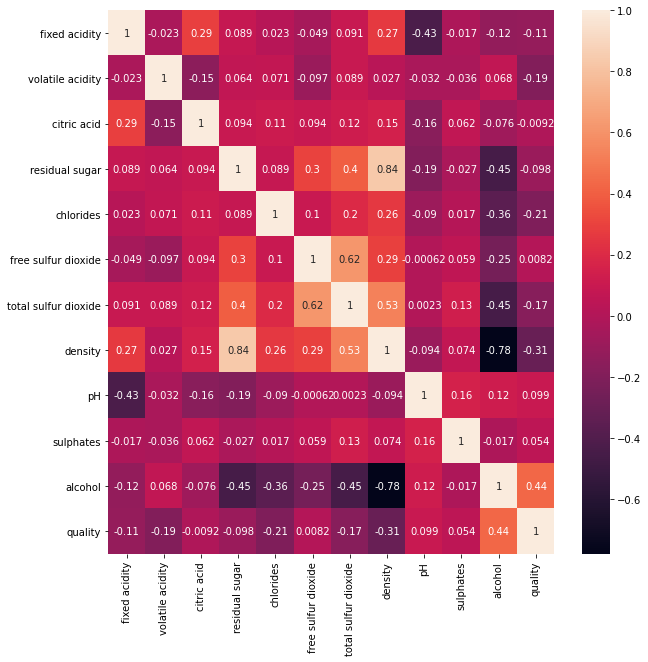

In [87]:
fig, ax = plt.subplots(figsize=(10,10))   
sb.heatmap(data.corr(), annot=True, ax= ax)

# Reconstruccion de los datos

In [88]:
x = data.loc[:, data.columns != 'quality'].to_numpy()
y = data.loc[:, data.columns == 'quality'].to_numpy().tolist()
x

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [89]:
y = np.array(y)
y

array([[6],
       [6],
       [6],
       ...,
       [6],
       [7],
       [6]])

# Division de los datos

In [90]:
x_train = []
y_train = []

x_test = []
y_test = []

for i in range(len(data)):
    if i <= int(len(data) * 0.8) : 
        x_train.append(x[i])
        y_train.append(y[i])
    elif  i > int(len(data) * 0.8) :
        y_test.append(y[i])
        x_test.append(x[i])


x_train = np.array(x_train)
y_train = np.array(y_train)
y_test  = np.array(y_test)
x_test = np.array(x_test)


In [91]:
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)

x_train.shape[0]

3919

In [92]:
y_test.shape[0]

979

In [93]:
x_train

array([[ 1.  ,  7.  ,  0.27, ...,  3.  ,  0.45,  8.8 ],
       [ 1.  ,  6.3 ,  0.3 , ...,  3.3 ,  0.49,  9.5 ],
       [ 1.  ,  8.1 ,  0.28, ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 1.  ,  7.1 ,  0.37, ...,  3.17,  0.27, 13.6 ],
       [ 1.  ,  6.2 ,  0.28, ...,  3.18,  0.52,  9.4 ],
       [ 1.  ,  6.4 ,  0.35, ...,  3.12,  0.4 , 14.2 ]])

In [94]:
y_train = y_train.reshape(y_train.shape[0],)

y_train[:10]

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

Siguiendo los metodos tradicionales en las pruebas de datos por aprendizaje automático, nos aseguramos de crear datos para entrenar, y datos para probar, con eso podemos probar nuestra hipótesis con datos desconocidos, y con ello nuestros resultados no se veran comprometidos.

# Funciones establecidad

## Debido a que necesitamos alguna manera de probar nuestros datos, se creo, una funcion donde se realiza la prediccion por cada valor de y. Ademas se creo otra funcion que obtiene el RMSE, para observar la eficiencia de nuestra hipotesis entrenada

In [95]:
def prediction_raw(theta, x_test):
    test = np.zeros(x_test.shape[0])
    for num_index in range(len(x_test)):
        test[num_index] = theta[0] + theta[1]*x_test[num_index][0] + theta[2]*x_test[num_index][1]+theta[3]*x_test[num_index][2]+theta[4]*x_test[num_index][3]+theta[5]*x_test[num_index][4]+theta[6]*x_test[num_index][5]+theta[7]*x_test[num_index][6]+theta[8]*x_test[num_index][7]+theta[9]*x_test[num_index][8]+theta[10]*x_test[num_index][9]+theta[11]*x_test[num_index][10]

    return test

In [96]:
def Root_Mean_Squared_Error(y_test, predictions):
    mean_squared_error = 0
    n = len(y_test)
    for i in range(len(y_test)):
        mean_squared_error =  (np.square((y_test[i] - predictions[i])) + mean_squared_error)
    root_squared_error = np.sqrt(mean_squared_error/n)
    return root_squared_error[0]

# Ecuacion normal

In [97]:
theta_normal = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)) , np.dot(x_train.T , y_train))

theta_normal

array([ 1.46776977e+02,  4.43017908e-02, -1.74470356e+00, -3.82921264e-02,
        7.92084496e-02, -5.34195891e-02,  4.74999294e-03, -2.16077892e-04,
       -1.47289903e+02,  7.42980819e-01,  7.50890365e-01,  2.24326415e-01])

In [99]:
prediction_normal = prediction_raw(theta_normal, x_test)
Root_Mean_Squared_Error(y_test, prediction_normal)

0.7125509816630462

In [ ]:
prediction_normal[:10]

In [ ]:
y_test[:10]

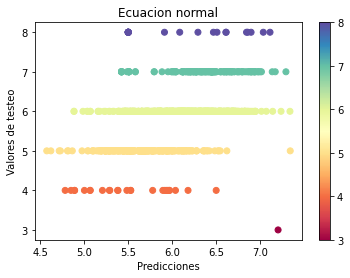

In [100]:
plt.scatter(prediction_normal, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Ecuacion normal')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Batch Gradient descent

In [101]:
number_of_features = x_train.shape[1]

theta_batch = np.random.rand(number_of_features)/100
print(theta_batch)

eta = 0.00001
n_iter = 20000
m = x_train.shape[0]

flag = True

j_batch = []
i = 0

delta = 0.01
meta = Root_Mean_Squared_Error(y_test, prediction_normal) +delta

paro = 0

corte = 5000
last_paro = 0
seg_corte = 0
seg_meta = 0

while flag:
    theta_batch = theta_batch - eta*(1/m * (x_train.T.dot((np.dot(x_train, theta_batch))  - y_train)))
    j_batch.append((1/(2*m))* np.square((np.dot(x_train, theta_batch)  - y_train)).sum())
    i = i +1
   
    prediction_batch_des = prediction_raw(theta_batch, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_batch_des)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) y J(i +1) es {}".format(abs(last_paro - paro)))
        corte = corte + 5000
        print()

    if paro  <  meta:
        flag = False
        seg_corte = abs(last_paro - paro)
    elif abs(last_paro - paro) < 0.00000001:
        flag = False
        seg_corte = abs(last_paro - paro)
    last_paro = paro
    seg_meta = seg_corte   
print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) y J(i +1) es {}".format(seg_corte))
print("Los valores de theta fueron: ")
print(theta_batch)



[0.00964302 0.00193065 0.00460171 0.00060311 0.00061876 0.00470792
 0.0029675  0.00766261 0.0023617  0.00101818 0.0055354  0.00665634]
El valor 5000 es un punto de corte
El valor 1.0375053200533435 representa al RMSE actual se quiere llegar a 0.7225509816630462
La diferencia entre J(i) y J(i +1) es 9.104629888723181e-05

El valor 10000 es un punto de corte
El valor 0.8012486225153875 representa al RMSE actual se quiere llegar a 0.7225509816630462
La diferencia entre J(i) y J(i +1) es 1.9452813001086255e-05

El valor 15000 es un punto de corte
El valor 0.7531993244073627 representa al RMSE actual se quiere llegar a 0.7225509816630462
La diferencia entre J(i) y J(i +1) es 3.8830665218814175e-06

El valor 20000 es un punto de corte
El valor 0.7431680301713788 representa al RMSE actual se quiere llegar a 0.7225509816630462
La diferencia entre J(i) y J(i +1) es 8.974483461932081e-07

El valor 25000 es un punto de corte
El valor 0.7406792338016611 representa al RMSE actual se quiere llegar a

In [102]:
prediction_batch_des = prediction_raw(theta_batch, x_test)
Root_Mean_Squared_Error(y_test, prediction_batch_des)

0.7399049602222033

In [106]:
prediction_batch_des[:10]

array([6.76671678, 6.05034651, 6.011704  , 6.70756524, 5.71720152,
       5.71720152, 6.04315144, 5.71017984, 6.0184081 , 5.24436644])

In [107]:
y_test[:10]

array([[6],
       [6],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5]])

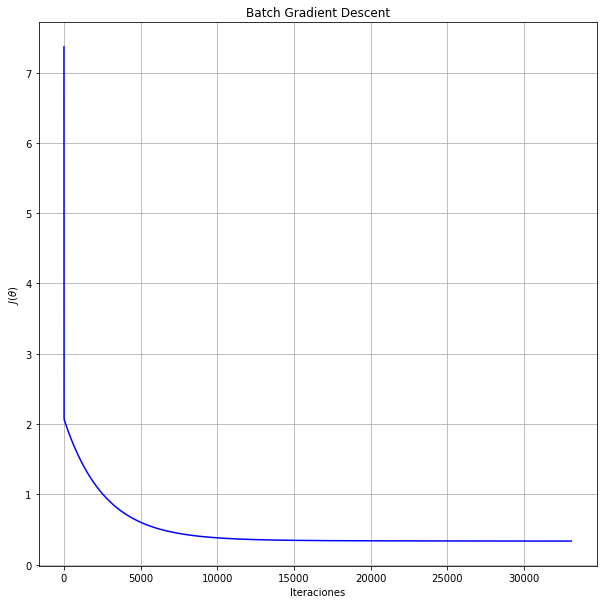

In [103]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_batch)),j_batch,"b-")
plt.title('Batch Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()


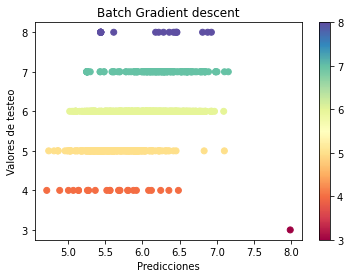

In [104]:
plt.scatter(prediction_batch_des, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Batch Gradient descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Stochastic Gradient Descent

In [132]:


number_of_features = x_train.shape[1]

theta_stoch =  np.random.rand(number_of_features)/100

print(theta_stoch)

eta = 0.02
n_iter = 15000
m = x_train.shape[0]
delta = 0.05
flag = True
j_stoch = []
i = 0
meta = Root_Mean_Squared_Error(y_test, prediction_normal) + delta

paro = 0
last_paro = 10
seg_meta = 0
corte = 5000

while flag:
    random_indices = np.random.randint(0 ,m -1)
    x_stoch = x_train[random_indices]
    y_stoch = y_train[random_indices]

    theta_stoch = theta_stoch - eta*(1/m * x_stoch.T.dot(((np.dot(x_stoch, theta_stoch))  - y_stoch)))
    j_stoch.append((1/(2*m))* np.square((np.dot(x_train, theta_stoch)  - y_train)).sum())    
    i = i +1

    prediction_stoch_des = prediction_raw(theta_stoch, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_stoch_des)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) y J(i +1) es {}".format(abs(last_paro - paro)))
        corte = corte + 5000
        print()

    if paro  <  meta:
        flag = False
        seg_corte = abs(last_paro - paro)
    elif abs(last_paro - paro) < 0.000000001:
        flag = False
        seg_corte = abs(last_paro - paro)
    last_paro = paro
    seg_meta = seg_corte
print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) y J(i +1) es {}".format(seg_corte))
print("Los valores de theta fueron: ")
theta_stoch

[0.0087147  0.00703966 0.00708615 0.00207428 0.00705173 0.0008173
 0.00335797 0.00995137 0.00284008 0.0082307  0.00408498 0.00595455]
El valor 5000 es un punto de corte
El valor 1.372809395968465 representa al RMSE actual se quiere llegar a 0.7625509816630462
La diferencia entre J(i) y J(i +1) es 0.003914160839165293

El valor 10000 es un punto de corte
El valor 1.0123294329859054 representa al RMSE actual se quiere llegar a 0.7625509816630462
La diferencia entre J(i) y J(i +1) es 0.0021701783636762784

El valor 15000 es un punto de corte
El valor 0.9188784177454135 representa al RMSE actual se quiere llegar a 0.7625509816630462
La diferencia entre J(i) y J(i +1) es 0.011475009121489133

El valor 20000 es un punto de corte
El valor 0.807163197794608 representa al RMSE actual se quiere llegar a 0.7625509816630462
La diferencia entre J(i) y J(i +1) es 0.009788790711647288

El valor 25000 es un punto de corte
El valor 0.7757931514565868 representa al RMSE actual se quiere llegar a 0.76255

array([0.03525807, 0.16838289, 0.0115525 , 0.00949579, 0.00704137,
       0.00141813, 0.01297537, 0.00105121, 0.02906202, 0.09534886,
       0.01695206, 0.34966178])

In [133]:
prediction_stoch_des = prediction_raw(theta_stoch, x_test)
Root_Mean_Squared_Error(y_test, prediction_stoch_des)

0.7624396220299915

In [134]:
prediction_stoch_des[:10]

array([6.57560881, 6.00010811, 6.05945723, 6.46845204, 5.66668754,
       5.66668754, 5.9958979 , 5.55650978, 5.85028218, 5.28555662])

In [135]:
y_test[:10]

array([[6],
       [6],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5]])

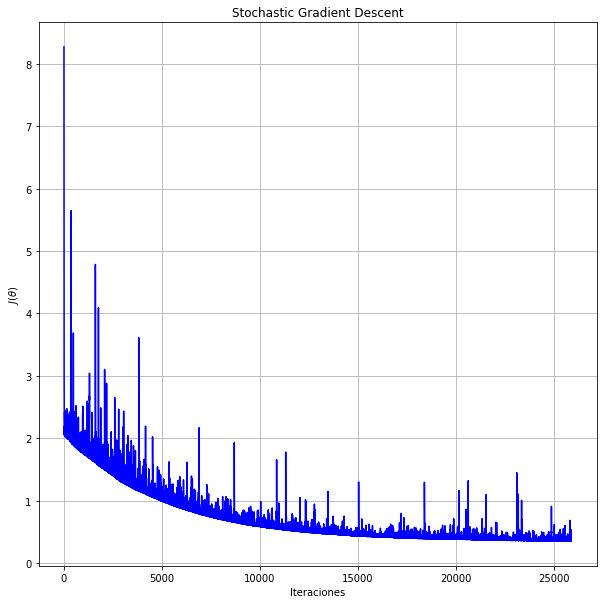

In [136]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_stoch)),j_stoch,"b-")
plt.title('Stochastic Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()

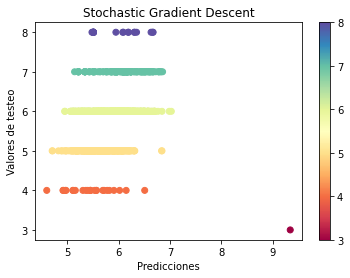

In [137]:
plt.scatter(prediction_stoch_des, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Stochastic Gradient Descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Mini-Batch Gradient Descent

In [126]:
number_of_features = x_train.shape[1]

theta_mini =np.random.rand(number_of_features)/100

print(theta_mini)

eta = 0.01
n_iter = 1000
m = x_train.shape[0]
batch_size = 24

num_batches = int(m/batch_size)

delta =  0.00
flag = True
j_mini = []
i = 0
meta = Root_Mean_Squared_Error(y_test, prediction_normal) + delta

paro = 0
last_paro = 0
corte = 5000
seg_meta = 0
seg_corte = 0
while flag:
    random_indices = np.random.permutation(m)
    x_batch_size = x_train[random_indices]
    y_batch_size = y_train[random_indices]
    
    for j in range(0 , m , batch_size):
        x_mini = x_batch_size[j:j + batch_size]
        y_mini = y_batch_size[j:j + batch_size]
        theta_mini =  theta_mini  - (eta/m) * (x_mini.T.dot(((np.dot(theta_mini, x_mini.T)) - y_mini)))  
    j_mini.append((1/(2*m))* np.square((np.dot(x_train, theta_mini)  - y_train)).sum())  
    i = i +1  
    
    prediction_mini = prediction_raw(theta_mini, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_mini)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) y J(i +1) es {}".format(abs(last_paro - paro)))
        corte = corte + 5000
        print()

    if paro  <  meta:
        seg_corte = abs(last_paro - paro)
        flag = False
    elif abs(last_paro - paro) < 0.000001:
        seg_corte = abs(last_paro - paro)
        flag = False
    last_paro = paro
    seg_meta = seg_corte
print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) y J(i +1) es {}".format(seg_corte))
print("Los valores de theta fueron: ")
theta_mini

[0.00340394 0.00042506 0.0008081  0.00575161 0.00566158 0.00881299
 0.00647124 0.00877669 0.00496138 0.00576715 0.00547432 0.00808576]
El valor 5000 es un punto de corte
El valor 0.7837167687688407 representa al RMSE actual se quiere llegar a 0.7125509816630462
La diferencia entre J(i) y J(i +1) es 0.06005777059561357

Numero de iteraciones 6509
La meta se cumplio en 0.7194352602503736 se buscaba 0.7125509816630462
La diferencia entre J(i) y J(i +1) es 6.068921846180686e-07
Los valores de theta fueron: 


array([ 0.15823075, -0.0412441 , -0.83238982,  0.05947396,  0.02300601,
       -0.01469934,  0.0069779 , -0.00209485,  0.15515782,  0.50324427,
        0.35509927,  0.38960028])

In [127]:
prediction_mini = prediction_raw(theta_mini, x_test)
Root_Mean_Squared_Error(y_test, prediction_mini)

0.7194352602503736

In [128]:
prediction_mini[:10]

array([6.595406  , 5.85237139, 5.78722343, 6.55496113, 5.17869952,
       5.17869952, 5.43445536, 5.75397697, 6.04053475, 5.29210421])

In [129]:
y_test[:10]

array([[6],
       [6],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5]])

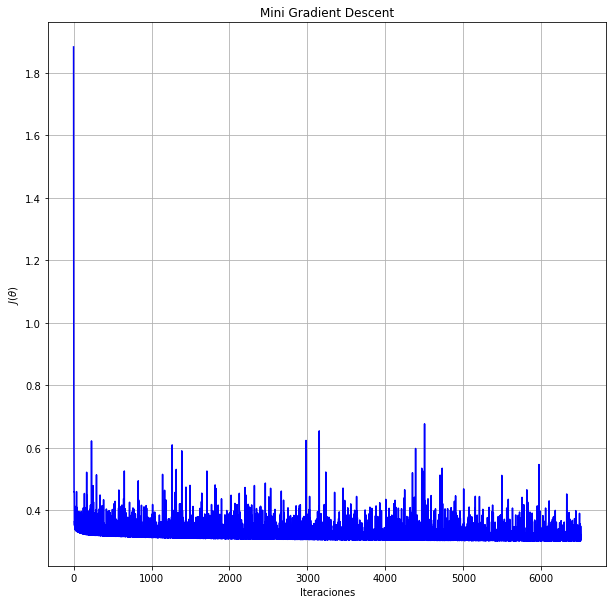

In [130]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_mini)),j_mini,"b-")
plt.title('Mini Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()

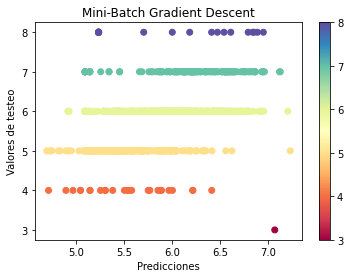

In [131]:
plt.scatter(prediction_mini, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Mini-Batch Gradient Descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()